In [1]:
from PIL import Image
import kraken
from kraken import binarization
from kraken import blla
from kraken import serialization
from kraken.lib import vgsl
import os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

2024-10-25 19:42:03.146647: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
filename = 'datasets/litke/valid/images/1_6.png'

In [3]:
model_path = 'blla.mlmodel'
model = vgsl.TorchVGSLModel.load_model(model_path)

In [4]:
img = Image.open(filename)

In [5]:
bw = binarization.nlbin(img)

In [6]:
baseline_seg = blla.segment(bw, model=model, device='cuda')

In [7]:
baseline_seg.lines

[BaselineLine(id='2665cc83-bbbd-4f9c-b474-0440ae6b01ed', baseline=[[13, 1051], [24, 1060], [28, 1091]], boundary=[[48, 1060], [51, 1040], [13, 1051], [0, 1053], [2, 1071], [2, 1071], [8, 1093], [28, 1091], [46, 1084], [48, 1060]], text=None, base_dir=None, type='baselines', imagename=None, tags={'type': 'default'}, split=None, regions=['2404aa4c-b7e6-4996-9356-ca4035f02727']),
 BaselineLine(id='94d964d1-eb93-426f-88b8-ea6475e0f794', baseline=[[11, 1164], [37, 1164]], boundary=[[11, 1184], [35, 1188], [37, 1164], [37, 1126], [13, 1115], [11, 1164], [11, 1184]], text=None, base_dir=None, type='baselines', imagename=None, tags={'type': 'default'}, split=None, regions=['2404aa4c-b7e6-4996-9356-ca4035f02727']),
 BaselineLine(id='2c015105-5df7-4731-814a-de37f32dac20', baseline=[[17, 2008], [20, 2022]], boundary=[[17, 2008], [2, 2008], [0, 2013], [0, 2017], [20, 2022], [46, 2008], [42, 2002], [17, 2008]], text=None, base_dir=None, type='baselines', imagename=None, tags={'type': 'default'}, sp

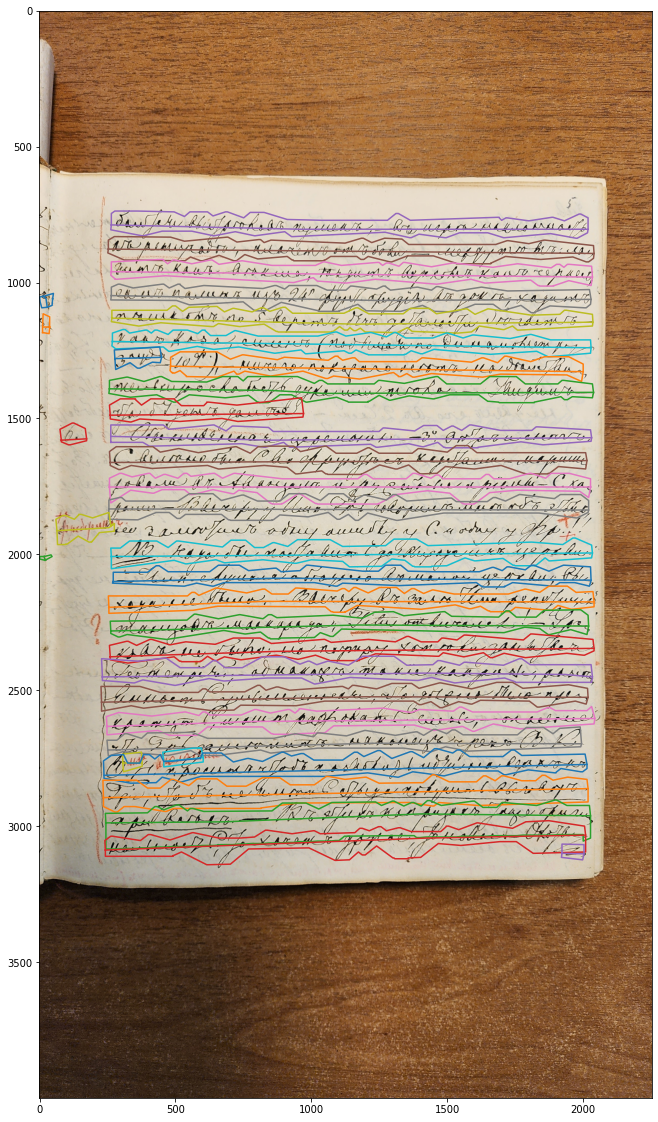

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(img)
for line in baseline_seg.lines:
    plt.plot([b[0] for b in line.baseline], [b[1] for b in line.baseline])
    color = plt.gca().lines[-1].get_color()
    plt.plot([b[0] for b in line.boundary], [b[1] for b in line.boundary], color=color)
plt.show()